In [1]:
from pl_bolts.models.autoencoders import VAE
from glob import glob

checkpoint_dirs = {
    "vae": "../log/cifar10-resnet-vae/tensorboard/normal_vae/lightning_logs/version_0/checkpoints",
    "gamma_1": "../log/cifar10-resnet-vae/tensorboard/gamma_1.0/lightning_logs/version_1/checkpoints",
    "ae": "../log/cifar10-resnet-vae/tensorboard/normal_ae/lightning_logs/version_0/checkpoints",
}

ckpt_path = glob(checkpoint_dirs["vae"] + "/*.ckpt")[0]
model = VAE.load_from_checkpoint(ckpt_path)
model

/usr/local/lib/python3.8/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.8/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:92: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task: Union[FeatureMapContrastiveTask] = FeatureMapContr

VAE(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): EncoderBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): EncoderBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

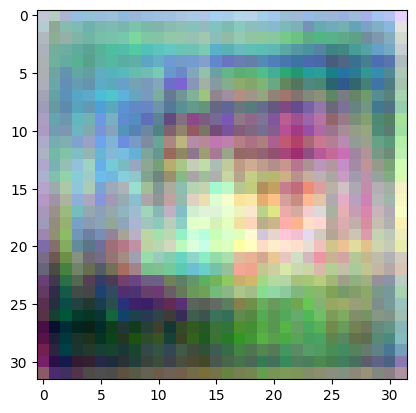

In [2]:
import torch

# 潜在空間の次元を取得します
latent_dim = model.latent_dim

# ランダムな潜在ベクトルを生成します（例えば、標準正規分布からのサンプリング）
z = torch.randn(1, latent_dim)

# デコーダに潜在ベクトルを渡して画像を生成します
with torch.no_grad():
    generated_img = model.decoder(z)

# テンソルを画像に変換して表示します
import matplotlib.pyplot as plt
import numpy as np

# PyTorchのテンソルはチャンネルが先頭に来るので、matplotlibで表示するためには、
# チャンネル次元を最後に移動させる必要があります (C, H, W) -> (H, W, C)
generated_img = generated_img.squeeze().permute(1, 2, 0)

# テンソルをnumpy配列に変換します
generated_img_np = generated_img.numpy()

# 画像を表示します
plt.imshow(np.clip(generated_img_np, 0, 1))
plt.show()

/tmp/ipykernel_562598/162470677.py:13: UnderReviewWarning: The feature CIFAR10 is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  dataset = CIFAR10("../data", download=True, transform=ToTensor())
/usr/local/lib/python3.8/dist-packages/pl_bolts/datasets/cifar10_dataset.py:80: UnderReviewWarning: The feature LightDataset is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  super().__init__()
/tmp/ipykernel_562598/162470677.py:23: UnderReviewWarning: The feature VAE is currently marked under review. The compatibility with other Lig

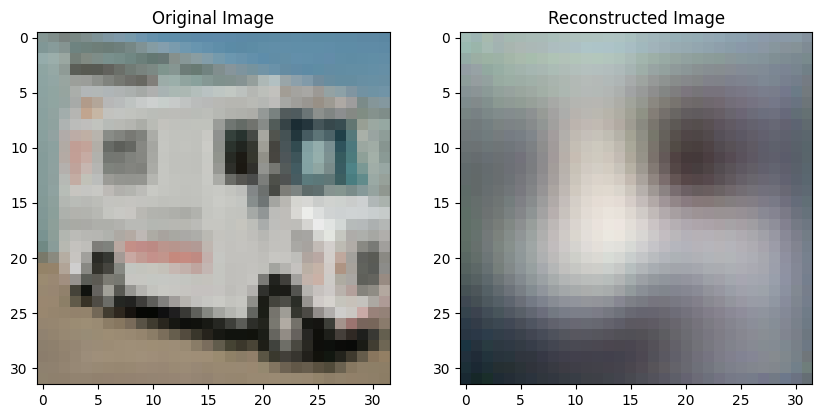

In [3]:
from torchvision import transforms
from pl_bolts.transforms.dataset_normalizations import cifar10_normalization
from pl_bolts.datasets.cifar10_dataset import CIFAR10
import numpy as np
from matplotlib import pyplot as plt

import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor

# データセットの定義
dataset = CIFAR10("../data", download=True, transform=ToTensor())

# データローダーの作成
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# チェックポイントファイルのパス
ckpt_path = glob(checkpoint_dirs["vae"] + "/*.ckpt")[0]

# チェックポイントからモデルをロード
# model = VAE.load_from_checkpoint(ckpt_path)
model = VAE(input_height=32).from_pretrained("cifar10-resnet18")

# モデルを評価モードにする
model.eval()

# データローダーから一つのバッチを取り出す
images, labels = next(iter(dataloader))

# モデルを使用して画像を再構成する
with torch.no_grad():
    outputs = model(images)

# 元の画像を表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(images[0].permute(1, 2, 0))

# 再構成画像を表示
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(outputs[0].detach().permute(1, 2, 0))

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


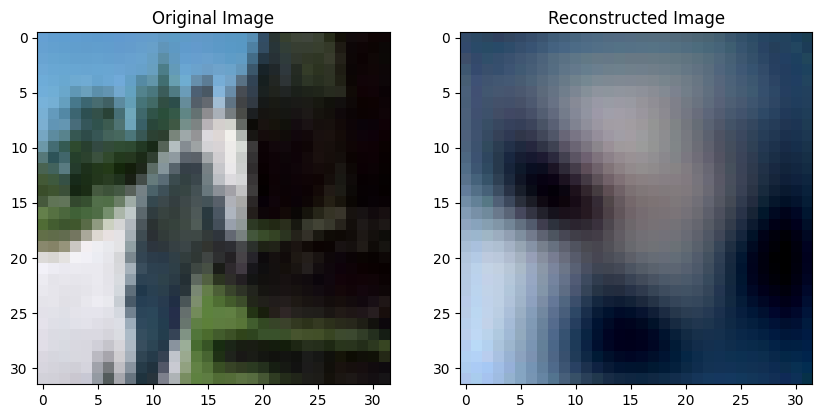

In [4]:
# データローダーから一つのバッチを取り出す
images, labels = next(iter(dataloader))

# モデルを使用して画像を再構成する
with torch.no_grad():
    outputs = model(images)

# 元の画像を表示
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(images[0].permute(1, 2, 0))

# 再構成画像を表示
plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(outputs[0].detach().permute(1, 2, 0))

plt.show()

In [12]:
from torchmetrics.image.fid import FrechetInceptionDistance

fid = FrechetInceptionDistance(64)

# データローダーから一つのバッチを取り出す
images, labels = next(iter(dataloader))
print(images.dtype)

# モデルを使用して画像を再構成する
with torch.no_grad():
    outputs = model(images)

fid.update(images.type(torch.uint8), real=True)
fid.update(outputs.type(torch.uint8), real=False)
fid.compute()

torch.float32


ValueError: array must not contain infs or NaNs